Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


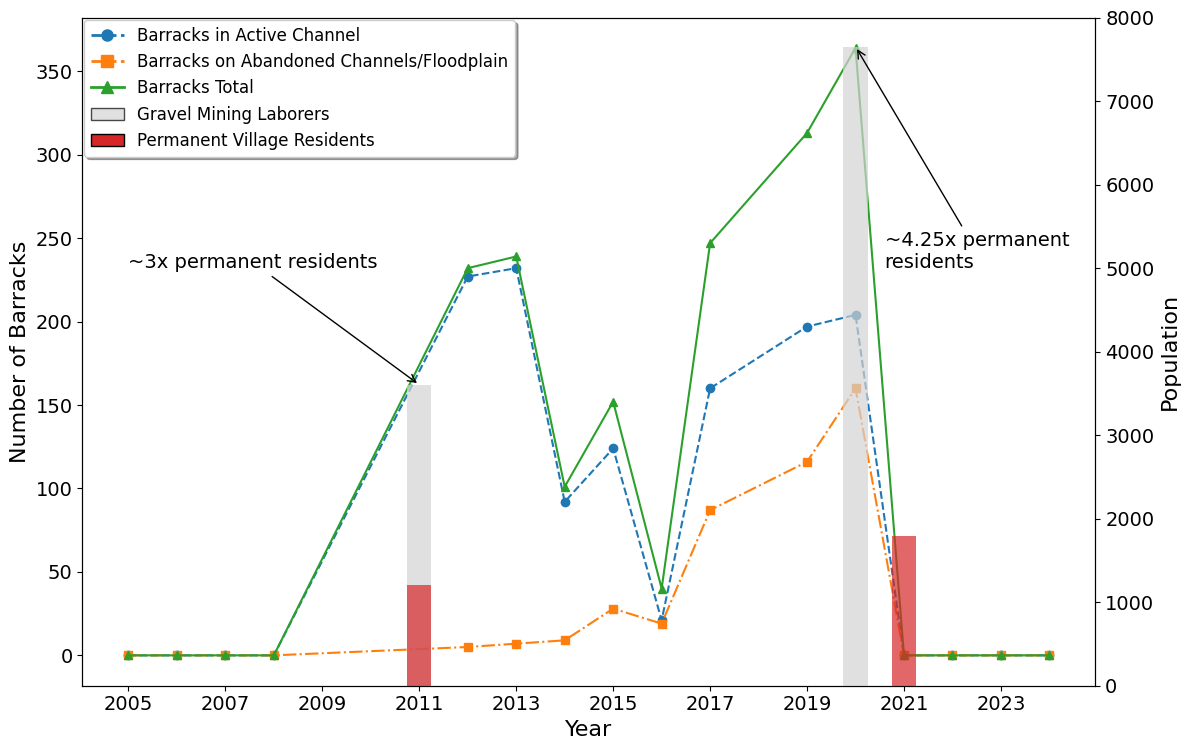

Figure saved successfully at /content/drive/MyDrive/1_academic/1_phd/3_lubha/ufc/figures/fig6_barracks/fig6_barracks.png


In [5]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install necessary libraries (if not already installed)
!pip install pandas geopandas matplotlib contextily

# Step 3: Import the libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load the data from Google Drive
file_path = '/content/drive/MyDrive/1_academic/1_phd/3_lubha/ufc/figures/fig6_barracks/plot_barracks.xlsx'  # Update with your actual file path
data = pd.read_excel(file_path)

# Step 4: Plot the data with primary and secondary y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary y-axis (barracks data)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Number of Barracks', color='black', fontsize=16)

# Adjust tick parameters for the primary y-axis
ax1.tick_params(axis='y', labelcolor='black', labelsize=14)

# Set x-axis ticks to show every alternate year from 2005 to 2024
ax1.set_xticks(range(2005, 2025, 2))
ax1.tick_params(axis='x', labelsize=14)

# Secondary y-axis (population)
ax2 = ax1.twinx()
ax2.set_ylabel('Population', color='black', fontsize=16)
ax2.set_ylim([0, 8000])
ax2.tick_params(axis='y', labelcolor='black', labelsize=14)

# Population data
permanent_population = [1201, 1796]  # Permanent population for 2011 and 2021
barracks_population_2011 = 3603  # Temporary population in 2011 (3x permanent population)
barracks_population_2021 = 7651  # Temporary population in 2021 (4.25x permanent population)

years = [2011, 2020]
total_population = [barracks_population_2011, barracks_population_2021]

# Bar chart for 2011 and 2020/2021 with red bars having alpha=0.7
# 2011 Data (Temporary and Permanent population)
ax2.bar([2011], [barracks_population_2011], width=0.5, color='lightgrey', label='Gravel Mining Laborers', zorder=1, alpha=0.7)
ax2.bar([2011], [1201], width=0.5, color='tab:red', label='Permanent Village Residents', zorder=1, alpha=0.7)

# 2020 and 2021 Data
ax2.bar([2020], [barracks_population_2021], width=0.5, color='lightgrey', zorder=1, alpha=0.7)
ax2.bar([2021], [1796], width=0.5, color='tab:red', zorder=1, alpha=0.7)


# Now plot the curves (after the bars)
ax1.plot(data['year'], data['barracks_c'], label='Barracks in Active Channel', color='tab:blue', marker='o', linestyle='--', zorder=10)
ax1.plot(data['year'], data['barracks_fp'], label='Barracks on Abandoned Channels/Floodplain', color='tab:orange', marker='s', linestyle='-.', zorder=10)
ax1.plot(data['year'], data['barracks_total'], label='Barracks Total', color='tab:green', marker='^', linestyle='-', zorder=10)

# Adjust annotation positions
# Annotation for 2011
ax2.annotate('~3x permanent residents', xy=(2011, barracks_population_2011), xytext=(2005, 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, color='black')

# Annotation for 2020 (temporary population)
ax2.annotate('~4.25x permanent\nresidents', xy=(2020, barracks_population_2021), xytext=(2020.6, 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14, color='black')

# Combine legends from both axes and place them with better formatting
legend_elements = [
    Line2D([0], [0], color='tab:blue', marker='o', linestyle='--', label='Barracks in Active Channel', markersize=8, linewidth=2),
    Line2D([0], [0], color='tab:orange', marker='s', linestyle='-.', label='Barracks on Abandoned Channels/Floodplain', markersize=8, linewidth=2),
    Line2D([0], [0], color='tab:green', marker='^', linestyle='-', label='Barracks Total', markersize=8, linewidth=2),
    Patch(facecolor='lightgrey', edgecolor='black', label='Gravel Mining Laborers', alpha=0.7),
    Patch(facecolor='tab:red', edgecolor='black', label='Permanent Village Residents')
]

# Add the legend at a custom position
fig.legend(
    handles=legend_elements,
    loc='upper left',
    bbox_to_anchor=(0.07, 0.975),  # near top-left corner
    ncol=1,                       # one column, each label on its own line
    fontsize=12,
    frameon=True,
    shadow=True,
    fancybox=True,
    columnspacing=1,
    handletextpad=0.8,
    borderaxespad=0.3
)





# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save the figure with 600 DPI resolution
output_file_path = '/content/drive/MyDrive/1_academic/1_phd/3_lubha/ufc/figures/fig6_barracks/fig6_barracks.png'  # Update the path if needed
fig.savefig(output_file_path, dpi=1200, bbox_inches='tight', format='png')

# Show the updated plot
plt.show()

print(f"Figure saved successfully at {output_file_path}")
